Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-14 20:25:22--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.138.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.138.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.9MB/s    in 4.6s    

2020-07-14 20:25:27 (42.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [ ]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [ ]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [ ]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [ ]:
##### YOUR CODE HERE #####
import pandas as pd

In [ ]:
##### YOUR CODE HERE #####
products = pd.read_csv('/content/instacart_2017_05_01/products.csv')
orders = pd.read_csv('/content/instacart_2017_05_01/order_products__prior.csv')

In [ ]:
orders 
order_n = orders['product_id']
#I need product_id from this dataset

In [ ]:
order_n

0           33120
1           28985
2            9327
3           45918
4           30035
            ...  
32434484    39678
32434485    11352
32434486     4600
32434487    24852
32434488     5020
Name: product_id, Length: 32434489, dtype: int64

In [ ]:
#I need to merge product name and product_id with product_id in the orders set
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
products_n = products[['product_id', 'product_name']]
products_n

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla"
49684,49685,En Croute Roast Hazelnut Cranberry
49685,49686,Artisan Baguette
49686,49687,Smartblend Healthy Metabolism Dry Cat Food


In [ ]:
#Merging
product_order = pd.merge(order_n, products_n, on='product_id')

In [ ]:
#Checking that there are correct number of entries. Should have 32434489
product_order

,product_id,product_name
0,33120,Organic Egg Whites
1,33120,Organic Egg Whites
2,33120,Organic Egg Whites
3,33120,Organic Egg Whites
4,33120,Organic Egg Whites
...,...,...
32434484,43492,Gourmet Burger Seasoning
32434485,43492,Gourmet Burger Seasoning
32434486,33097,Piquillo & Jalapeno Bruschetta
32434487,38977,Original Jerky


In [ ]:
#pulling top ten highest counts out of list
count_top_ten = product_order['product_name'].value_counts().head(10)

In [ ]:
#checking values are correct
count_top_ten

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

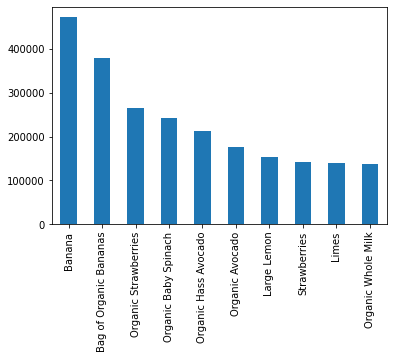

In [ ]:
#graph of top ten highest ordere products
count_top_ten.plot(kind='bar')

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [289]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [290]:
# table2 -> tidy
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [291]:
table2.index.tolist()

['treatmenta', 'treatmentb']

In [292]:
#reset table index
table2 = table2.reset_index()
table2


,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [293]:
#Melt column title to vairables
tidy = table2.melt(id_vars='index' , value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [294]:
#reorder columns 
tidy = tidy[['variable', 'index', 'value']]
tidy

,variable,index,value
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [295]:
#rename columns
tidy = tidy.rename(columns={
    'variable': 'name', 
    'index': 'trt', 
    'value': 'result'
})
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,John Smith,treatmentb,2.0
2,Jane Doe,treatmenta,16.0
3,Jane Doe,treatmentb,11.0
4,Mary Johnson,treatmenta,3.0
5,Mary Johnson,treatmentb,1.0


In [296]:
#shorten treaments/b
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [301]:
# tidy -> table2
table_2 = tidy.reset_index()
table_2

,name,trt,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0


In [303]:
# tidy -> table2
table_2 = tidy.pivot_table(index='trt', columns='name', values='result')
table_2

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [304]:
table_2_1 = table_2.reset_index()
table_2_1

name,trt,Jane Doe,John Smith,Mary Johnson
0,a,16.0,NaN,3.0
1,b,11.0,2.0,1.0


In [306]:
table_2_1 = table_2_1[['trt','Jane Doe', 'John Smith', 'Mary Johnson']]
table_2_1

name,trt,Jane Doe,John Smith,Mary Johnson
0,a,16.0,NaN,3.0
1,b,11.0,2.0,1.0


In [314]:
table_final = table_2_1[['trt','Jane Doe','John Smith','Mary Johnson']].set_index('trt')
table_final

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [320]:
flights = sns.load_dataset('flights')
flights
flights_piv = flights.pivot_table(index='year', columns='month', values='passengers')
flights_piv

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [ ]:
# Flights Pivot Table

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####